<a href="https://colab.research.google.com/github/LuisoRubi/LuisoRubi/blob/main/PECP_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns
from scipy.stats import norm
import scipy.stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
df = pd.read_csv('WineQuality_Red.csv')
df.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
median = df.median().round(2)
median

,0
fixed acidity,7.90
volatile acidity,0.52
citric acid,0.26
residual sugar,2.20
chlorides,0.08
free sulfur dioxide,14.00
total sulfur dioxide,38.00
density,1.00
pH,3.31
sulphates,0.62


In [15]:
desviaciones = df.std().round(2)
desviaciones

,0
fixed acidity,1.74
volatile acidity,0.18
citric acid,0.19
residual sugar,1.41
chlorides,0.05
free sulfur dioxide,10.46
total sulfur dioxide,32.90
density,0.00
pH,0.15
sulphates,0.17


In [16]:
percentil_75 = df.quantile(0.75).round(2)
percentil_75

,0.75
fixed acidity,9.20
volatile acidity,0.64
citric acid,0.42
residual sugar,2.60
chlorides,0.09
free sulfur dioxide,21.00
total sulfur dioxide,62.00
density,1.00
pH,3.40
sulphates,0.73


In [17]:
modas = df.mode()
modas

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.6,0.0,2.0,0.08,6.0,28.0,0.9972,3.3,0.6,9.5,5


In [9]:
average = df.mean().round(2)
average

,0
fixed acidity,8.32
volatile acidity,0.53
citric acid,0.27
residual sugar,2.54
chlorides,0.09
free sulfur dioxide,15.87
total sulfur dioxide,46.47
density,1.00
pH,3.31
sulphates,0.66


In [27]:
datos_ph = df['pH'].head(8)
datos_ph

,pH
0,3.51
1,3.20
2,3.26
3,3.16
4,3.51
5,3.51
6,3.30
7,3.39


In [28]:
data = [3.51, 3.20, 3.26, 3.16, 3.51, 3.51, 3.30, 3.39]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.873, p=0.161


In [29]:
if p > 0.05:
	print('Distribución Normal')
else:
	print('Distribución NO Normal')

Distribución Normal


En este caso, p-value es mayor a 0.05, por lo tanto no se rechaza la hipótesis nula.

2. ¿Cuál es el valor del test estadístico? (valor
entre 0 y 1). El valor estadístico es 0.873

3. ¿Cuál es el valor del p-value para esta
prueba bajo tu hipótesis? Imprime tu
resultado con 6 dígitos de exactitud para
que veas lo que sucede (print(‘p=%.6f’ %
(p)) )

In [30]:
data = [3.51, 3.20, 3.26, 3.16, 3.51, 3.51, 3.30, 3.39]
stat, p = shapiro(data)
print('stat=%.6f, p=%.6f' % (stat, p))

stat=0.872834, p=0.160632


4. Explica si rechazas o aceptas la hipótesis
nula H0 al nivel de significancia alpha = 0.05
¿Qué concluyes sobre la hipótesis?

Se rechaza que sea nula. Mi conclusión es que los datos parecen seguir una distribución normal.

5. De manera práctica, ¿cómo podrías
verificar si la distribución del pH sigue una
distribución normal? ¿Podrías decir que sí
proviene de una distribución normal?

R: Tendríamos que verificar le histograma. Como el valor p es 0.161, que es mayor que el nivel de significancia α = 0.05, no rechazamos la hipótesis nula. No hay evidencia suficiente para decir que los datos no siguen una distribución normal.

**Paso 2:**
Estandariza la variable alcohol y dibuja su histograma con 20 bins.



In [39]:
alcohol_avg = round(df['alcohol'].mean(),2)
alcohol_avg_sd = round(df['alcohol'].std(),2)
print(alcohol_avg,alcohol_avg_sd)

df['alcohol_stand'] = (df['alcohol'] - alcohol_avg)/alcohol_avg_sd

10.42 1.07


<Axes: xlabel='alcohol_stand', ylabel='Count'>

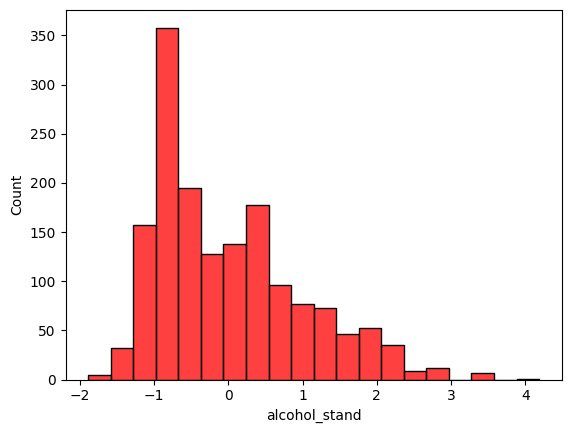

In [40]:
sns.histplot(df['alcohol_stand'], bins=20, color='red')

**Paso 3:** Obtener la probabilidad de obtener un nivel de alcohol menor a 10 en la
base de datos de la Calidad del Vino Tinto. Esta probabilidad la puedes
obtener mediante el uso de la función en Python. ¡No olvides de usar el
valor z (estandarizado)!

In [42]:
prob0 = scipy.stats.norm.cdf(( 10 - alcohol_avg) / alcohol_avg_sd)

print(round(prob0,4))

0.3473


¿Qué puedes sugerir de los niveles de alcohol tomando como
referencia la probabilidad anterior?

R: Se sugiere que el 34.73% de los vinos tienen un nivel menor a 10 en grado de alcohol. Esta reserva de vinos cuenta con una cantidad variable de vinos que no tienen una graduación alta. En base a esta información se podrán tomar decisiones de negocio sobre a qué tipo de clientes o contexto se les puede ofrecer este tipo de vinos.



(0.0, 15.225)

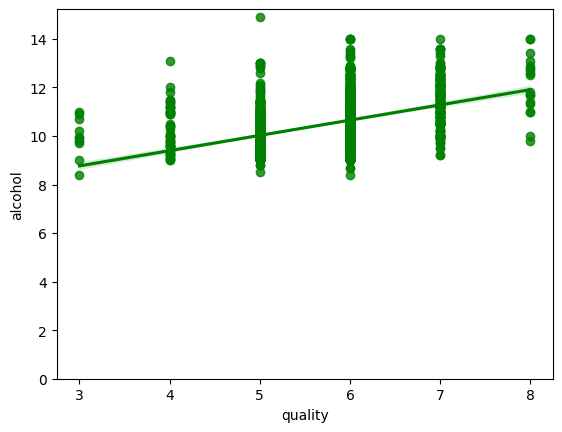

In [45]:
sns.regplot( x = "quality", y = "alcohol", data=df , color = 'green')
plt.ylim(0,)

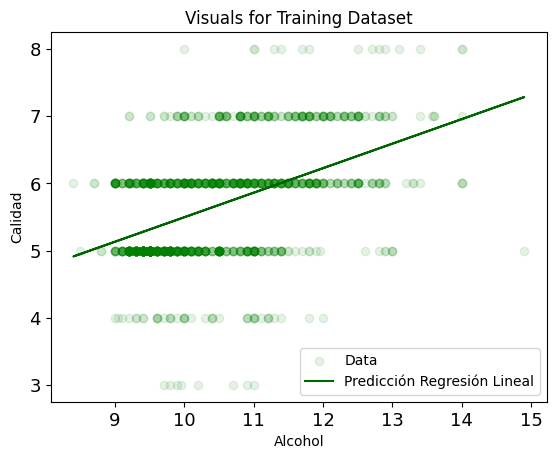

In [52]:
grado_alcohol = df['alcohol']
num_calidad = df['quality']

x = np.array(grado_alcohol).reshape(-1,1)
y = np.array(num_calidad)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.20, random_state=0)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)

pred = lr.predict(xtest)

plt.scatter( xtrain, ytrain, color= 'green', label="Data", alpha=.1)
plt.plot(xtrain, lr.predict(xtrain), color = 'darkgreen', label="Predicción Regresión Lineal")
plt.title ("Visuals for Training Dataset")
plt.xlabel("Alcohol")
plt.ylabel("Calidad")

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.legend()

plt.show()

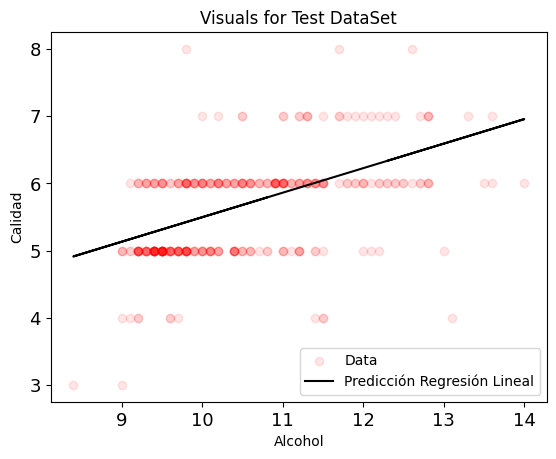

In [51]:
plt.scatter(xtest, ytest, color= 'red', label="Data", alpha=.1)
plt.plot(xtest, lr.predict(xtest), color = 'black', label="Predicción Regresión Lineal")
plt.title("Visuals for Test DataSet")
plt.xlabel("Alcohol")
plt.ylabel("Calidad")

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.legend()

plt.show()

¿Cuáles son los valores de las betas de la ecuación que
describe la regresión lineal?

In [53]:
print ("Promedio de Calidad en Train Data: {:.2f}".format(ytrain.mean()))
print ("Promedio del Calidad en Test Data: {:.2f}".format(ytest.mean()))

print('Intercepto Bo: {:0.3f}'.format(lr.intercept_))
print('Coefficiente B1: {}'.format(lr.coef_))


Promedio de Calidad en Train Data: 5.65
Promedio del Calidad en Test Data: 5.59
Intercepto Bo: 1.846
Coefficiente B1: [0.36494637]


In [56]:
pred = lr.predict(xtest)

rmse = float(format(np.sqrt(metrics.mean_squared_error(ytest,pred)),'.3f'))

print('Root Mean Squared Error (RMSE): {}'.format(rmse))

Root Mean Squared Error (RMSE): 0.661


In [57]:
rtrsm = float(format(lr.score(xtrain, ytrain),'.3f'))
rtesm = float(format(lr.score(xtest, ytest),'.3f'))

print('R-Squared (training): {}'.format(rtrsm))
print('R-Squared (test): {}'.format(rtesm))

R-Squared (training): 0.223
R-Squared (test): 0.238
